This notebook will go through all the targrets in the select text file and produce ......

This script is written by Larry with input from Mary, Jeno, Josh and Yong
08/04/2015


In [27]:
%matplotlib inline
import os
import sys
import numpy as np

In [28]:
import run_GALFA_functions_Larry as pf # as in "Plotting Functions"

In [60]:
# get target info
cycle = 'cycle_test'

objectName = 'AZ_Tri'
objectRA = 23.59 
objectDEC = 32.87 
objectGamma = 41
objectGammaError = 10
pf.setTargetInfo(name=objectName, raCoord=objectRA, decCoord=objectDEC, 
                 gamma=objectGamma, gammaE=objectGammaError, c=cycle)

# set destination folder stuff
# checking if folder exist
pf.checkTargetFolder(objectName, cycle)

In [5]:
# set cube info and get cube data
cubeFileInfo = pf.getTargetCubeinfo(objectRA, objectDEC)
cube_name = 'GALFAdata/data/GALFA_HI_RA+DEC_%06.2f+%05.2f_W.fits' % (cubeFileInfo[0], cubeFileInfo[1])
cubeData = pf.GALFAHI_cubeinfo(cube_name)
print "### reading from GALFA cube %06.2f, %05.2f" % (cubeFileInfo[0], cubeFileInfo[1])

### reading from GALFA cube 020.00, 34.35


In [6]:
# takes out the different slices of cubedata, remember data:[v,dec,ra]
data = cubeData[0]
vlsr = cubeData[2]
dec = cubeData[3]
ra = cubeData[4]
delv = cubeData[5]

# checks how far from the cube edge the targets are
raInd, decInd = pf.degreeCoordinatesToCubeIndices(objectRA, objectDEC)
up = dec.size - decInd
down = decInd
left = raInd
right = ra.size - raInd
print left, right, up, down

41.0 471.0 346.0 166.0


#RELOAD AFTER CHANGES!!!

#Plotting calls

###Spectrum

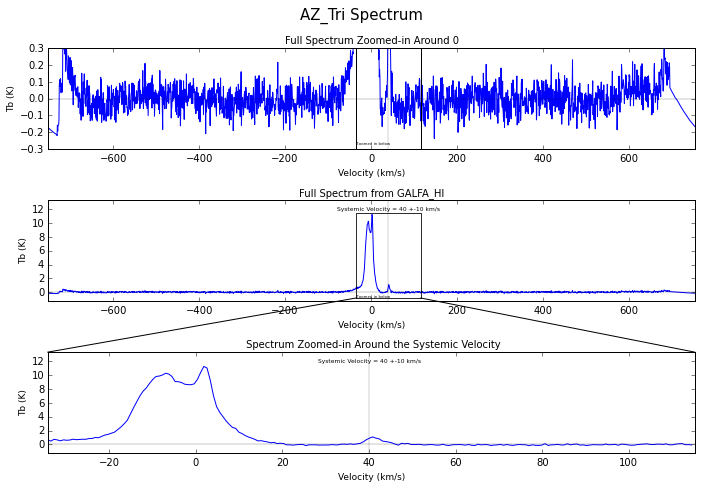

In [30]:
reload(pf)
spectrum = pf.getSpectrum(objectRA, objectDEC, boxSize=8, box='yes')
pf.plotSingleSpectrum(objectName, spectrum, closefig = 'no')

###On-off spectrum

8


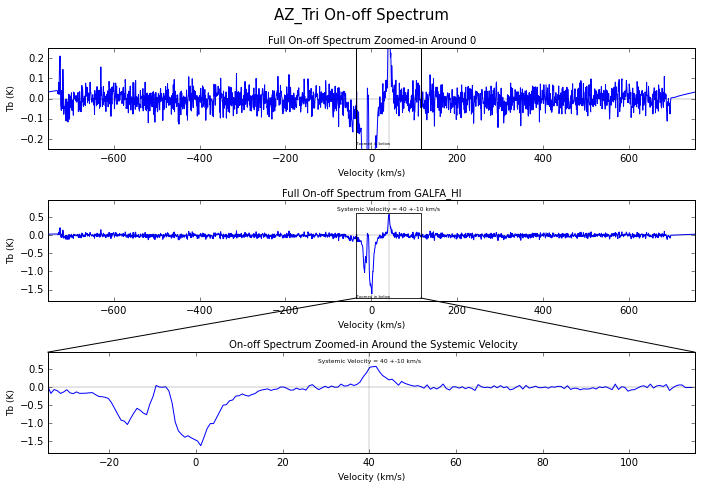

In [31]:
reload(pf)
onOffSpectrum = pf.getOnOffSpectrum(objectRA, objectDEC, boxSize=15)
pf.plotSingleSpectrum(objectName, onOffSpectrum[0], spectrumType='on-off', closefig='no')

###Nearby squares

8


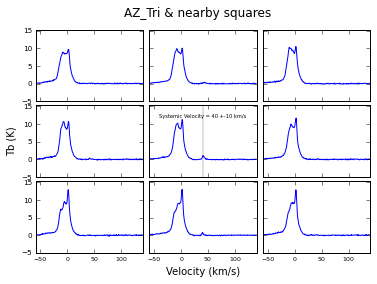

In [32]:
reload(pf)
pf.plotNearbySpectrum(objectName, objectRA, objectDEC, boxSize=8, closefig='no')

###Integrated intensity map

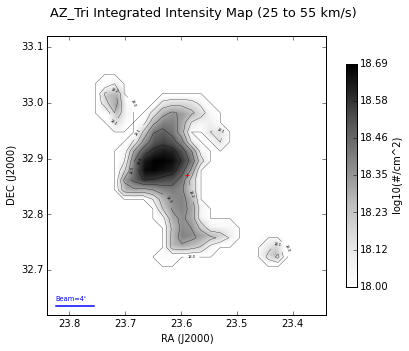

In [33]:
reload(pf)
pf.makeIntegratedIntensityMap(objectName, objectRA, objectDEC, 30, 30, closefig='no')

###Velocity channel map

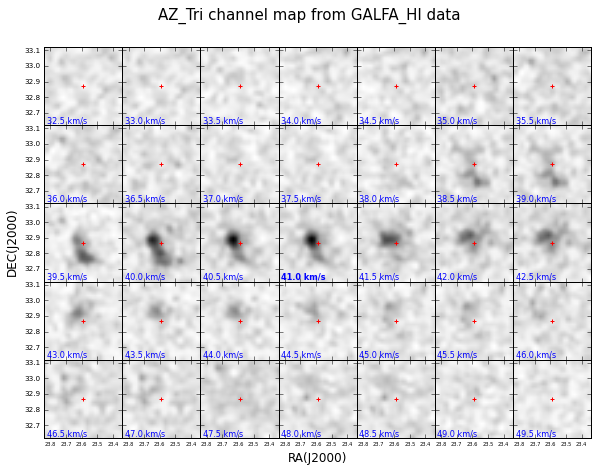

In [63]:
reload(pf)
pf.makeVelocityChannelMaps(objectName, objectRA, objectDEC, 30, 30, vSeparation=.5, closefig='no')

### _All map

8
8


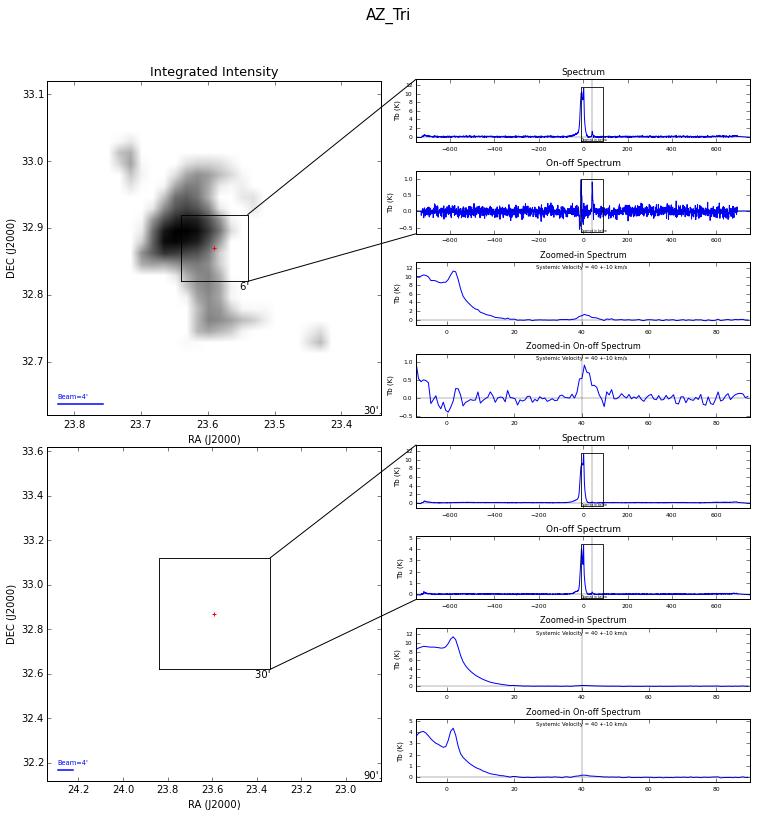

In [35]:
reload(pf)
pf.makeCombinedFigure(objectName, 6, 30, closefig='no')

In [ ]:
f.close()